In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
'''Initializaing data structure MSW'''
!gdown --id 1_k1H_JyXwyRoRFcXa_YKGXgqxOg1Kx5a 

Downloading...
From: https://drive.google.com/uc?id=1_k1H_JyXwyRoRFcXa_YKGXgqxOg1Kx5a
To: /content/MSW.py
100% 642/642 [00:00<00:00, 1.68MB/s]


### Load Pre-segmented texts 

In [ ]:
import json
import pickle
from MSW import MSW
SEGDIR = "/content/drive/MyDrive/110-1ComSem_final/w2v_resources"
with open (f'{SEGDIR}/MSW_leveled_list3.pkl', 'rb') as F:
    leveled_list = pickle.load(F)

'''
for msw in leveled_list:
  word = msw.word
  with open (f'{SEGDIR}/MSW_Segdict_{word}', 'w') as fp:
      MSW_Seg_word = json.load(fp)
'''


"\nfor msw in leveled_list:\n  word = msw.word\n  with open (f'{SEGDIR}/MSW_Segdict_{word}', 'w') as fp:\n      MSW_Seg_word = json.load(fp)\n"

In [9]:
!pip -q install opencc-python-reimplemented

     |████████████████████████████████| 484 kB 37.5 MB/s 


In [10]:
!wget https://github.com/Nana2929/stopwords/blob/master/cn_stopwords.txt?raw=true -O cn_stopwords.txt

--2022-01-03 04:16:27--  https://github.com/Nana2929/stopwords/blob/master/cn_stopwords.txt?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Nana2929/stopwords/raw/master/cn_stopwords.txt [following]
--2022-01-03 04:16:27--  https://github.com/Nana2929/stopwords/raw/master/cn_stopwords.txt
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Nana2929/stopwords/master/cn_stopwords.txt [following]
--2022-01-03 04:16:27--  https://raw.githubusercontent.com/Nana2929/stopwords/master/cn_stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [11]:
# download stopwords
from opencc import OpenCC
cc = OpenCC('s2t')
stopwords = []
with open('./cn_stopwords.txt', 'r') as F:
  for line in F.readlines():
    t = cc.convert(line.strip('\n'))
    stopwords.append(t)
###超重要的stopwords!!!####
# 月份
stopwords = ' '.join(stopwords)+"這些 那些 的 更 有 這個 那個 他們 她們 它們 牠們 於 月 日 被"
stopwords = stopwords.split()

In [12]:
import re 
punc = " ！？｡。＂＃＄％＆＇（()）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～《》｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
punc+="\n"
punc+="\t"
def clean(token_list):
  new_list = []
  for token in token_list:
    token = ''.join(x for x in list(token) if x not in punc and x not in stopwords)
    if len(token) != 0:
      new_list.append(token)
  return new_list 
List = ["\n","蘋果","起源於","中亞","，","：","新疆","野"]
clean(List)

['蘋果', '源', '中亞', '新疆', '野']

In [ ]:
stopwords

In [13]:
# testing: apple 
# 用sense裡的前80%句子當訓練文本
# 測試文本：剩下的句子

import random 
word = "蘋果" 
ratio = 0.8

with open (f'/content/drive/MyDrive/110-1ComSem_final/w2v_SegTexts/MSW_Segdict_{word}.json', 'r') as fp:
      apple_dict = json.load(fp)
categories = {}
apple_train_dict = {}
apple_test = []
for sense, sense_text in apple_dict.items():
    [coarse, fine] = sense.split('_')
    # 分類
    categories[sense] = coarse
    # randomize sense_text
    LEN = len(sense_text)
    random.shuffle(sense_text)
    cut_point = round(LEN*ratio)
    # rand_ = random.sample(sense_text, cut_point)
    # X_train = [clean(sense_text[i]) for i in cut_point]
    # X_test = [sense_text[i] for i in range(LEN) if i not in cut_point]
    
    Xtrain = sense_text[:cut_point]
    Xtest = sense_text[cut_point:]
    Xtrain = [clean(sent) for sent in Xtrain]
    for sent in Xtest:
      sent = clean(sent)
      '''只放有target word出現的'''
      if len(sent) > 0 and word in sent: 
        apple_test.append((sent, sense))
    apple_train_dict[sense] = Xtrain

In [ ]:
categories

{'main_蘋果': 'main',
 '公司_蘋果公司': '公司',
 '公司_蘋果園區': '公司',
 '報紙_蘋果日報': '報紙',
 '報紙_蘋果日報 (臺灣)': '報紙',
 '報紙_蘋果日報 (香港)': '報紙',
 '報紙_蘋果日報慈善基金': '報紙',
 '電影_蘋果 (電影)': '電影'}

In [ ]:
print(*apple_test, sep = '\n')

(['年', '全球', '蘋果', '產量', '萬', '公噸', '中國', '佔', '總產量', '半'], 'main_蘋果')
(['意利', '東北部', '烏迪', '附近', 'Sammardenchia-Cueis', '遺址', '中', '考古學家', '發現', '種', '類似', '蘋果', '碳化', '種子', '追溯', '公元', '前', '年'], 'main_蘋果')
(['清', '末年', '美國', '山東', '煙臺', '引進', '西洋', '品種', '蘋果', '俄', '戰爭', '關東州', '熊嶽', '設立', '農業', '試驗', '基', '引進', '西洋', '蘋果', '進行', '雜交', '改良'], 'main_蘋果')
(['世紀', '華盛頓', '東部', '開始', '實施', '灌溉', '項目', '發展', '數十億', '美元', '水果', '產業', '中', '蘋果', '主', '產品'], 'main_蘋果')
(['約', '年', '開始', '中國', '興', '耶誕節', '前夕', '平安夜', '送', '蘋果', '蘋', '寓意', '平安夜', '平安'], 'main_蘋果')
(['果蠅', '餵食', '蘋果', '淬取物', '壽命', '餵食', '般', '食物', '果蠅', '%'], 'main_蘋果')
(['美洲', '生產區', '分佈', '方面', '美國', '華盛頓州', '蘋果', '產量', '佔', '全', '美', '五成', '根廷', '蘋果', '集中', '裏', '奧格羅峪', '產量', '佔', '全', '國', '%'], 'main_蘋果')
(['蘋果', '選育', '開始', '森林', '覆蓋', '天山', '兩', '側', '選育', '程', '長', '段', '時間', '選育', '物種', '基', '滲入', '開放', '授粉', '種子', '中'], 'main_蘋果')
(['味', '甘鬆', '未', '熟', '食', '棉絮', '熟', '沙爛', '堪', '食', '惟', '八九', '分', '熟', '佳'], 'mai

In [ ]:
print(*apple_train_dict, sep = '\n')

main_蘋果
公司_蘋果公司
公司_蘋果園區
報紙_蘋果日報
報紙_蘋果日報 (香港)
報紙_蘋果日報 (臺灣)
報紙_蘋果日報慈善基金
電影_蘋果 (電影)


### TFIDF (normalized)
${tf_{i,j} = n_{i,j}/\sum_{k=1} n_{k,j}}$ 

${idf_i = |D|/|{j:t_i \in d_j}|}$
##### alternative idf:
${idf_i = log((|D|+1)/(|{j:t_i \in d_j}|+1))}$

${tfidf_{i,j} = tf_{i,j} * idf_i}$

#### https://www.itread01.com/hkyecfy.html
```
['賽季', '初', '時候', '眾望所歸', '西部', '決賽', '球隊']
火箭_燃氣推進裝置:
初, 頻數為: 2, TF-IDF值為: 12.49585502688717
火箭_NBA球隊名:
賽季, 頻數為: 63, TF-IDF值為: 204.6194333469459
初, 頻數為: 1, TF-IDF值為: 6.247927513443585
時候, 頻數為: 1, TF-IDF值為: 8.055282435501189
西部, 頻數為: 16, TF-IDF值為: 80.88451896801904
決賽, 頻數為: 7, TF-IDF值為: 33.13348038429679
球隊, 頻數為: 40, TF-IDF值為: 158.712783770034

經過詞義消岐，火箭在該句子中的意思為 NBA球隊名 .
```

In [14]:
import numpy as np
import pandas as pd 
def word_tfidf(target, docs):
    '''
    doc: a list of sentences
    docs: a collection of list of sentences
    target: a string (a word)
    '''
    Dcount = len(docs)
    cache = [0 for i in range(len(docs))]
    numerators = [-1 for i in range(len(docs))]
    denominators = [-1 for i in range(len(docs))]
    tfvalues = [-1 for i in range(len(docs))]
    for idx, doc in enumerate(docs):
        # flatten 
        flatdoc = [token for sentence in doc for token in sentence]
        # count 
        doclen = len(flatdoc)
        tcount = flatdoc.count(target)
        # tf 
        tf = tcount/doclen
        numerators[idx] = tf  
        if tcount > 0:
          cache[idx] = 1 # 有出現
    for idx, doc in enumerate(docs):
        # idf 
        selfhasoccur = cache[idx]
        occ = sum(cache) - selfhasoccur
        denominators[idx] = np.log((Dcount+1)/(occ+1))
        tfvalues[idx] = numerators[idx] / denominators[idx]
    return tfvalues

def TFIDF(testsent, docs, sensenames, wsdword, minlen = 2):  
    '''只算兩個字（含）以上的詞'''
    testsent = clean(testsent)
    print("* cleaned test sentence:\n", testsent)
    tfs = {}
    for word in testsent:
      if word != wsdword and len(word) >= minlen:
        tfs[word] = word_tfidf(word, docs)
    df = pd.DataFrame(tfs, index = sensenames)
    df["Tfidf_sum"] = df.sum(axis=1)
    # reordering, move tfidf-sum to front
    cols = list(df.columns.values)
    cols = cols[-1:] + cols[:-1]
    df = df[cols]
    return df["Tfidf_sum"].idxmax(), df 

In [ ]:
MAINDIR = '/content/drive/MyDrive/110-1ComSem_final/tfidf_resources/apple_test'
with open(MAINDIR+'/apple_train_dict.pkl', 'rb') as f:
    apple_train_dict = pickle.load(f)
with open(MAINDIR+'/apple_test.pkl', 'rb') as f:
    apple_test = pickle.load(f)

#### Testing block ####

In [15]:
import random
rand = random.randint(0, len(apple_test)-1)
# rand = 15
print('* Current random index:', rand)
apple_test_zero, answer = apple_test[0]
apple_test_zero, answer = apple_test[rand]
#############
applesenses = apple_train_dict.keys()
docs = apple_train_dict.values()
wsdword = "蘋果"
maxidx, df = TFIDF(apple_test_zero, docs, applesenses, wsdword)
print("* y:", answer)
print("* yhat:", maxidx)
df
# Correct: 194, 31, 15, 8, 39, 37
# Incorrect: 118, 30, 91 （公司和電影常會搞混）

* Current random index: 39
* cleaned test sentence:
 ['年', '蘋果', '發表', '聲明', '指', 'iPad', '開售', '八十', '售出', '三百萬', '部']
* y: 公司_蘋果公司
* yhat: 公司_蘋果公司


,Tfidf_sum,發表,聲明,iPad,開售,八十,售出,三百萬
main_蘋果,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
公司_蘋果公司,0.004351,0.001062,0.000000,0.002079,0.0,0.0,0.001062,0.000148
公司_蘋果園區,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
公司_蘋果唱片公司,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
報紙_蘋果日報,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
報紙_蘋果日報 (香港),0.001831,0.001017,0.000712,0.000000,0.0,0.0,0.000102,0.000000
報紙_蘋果日報 (臺灣),0.000360,0.000000,0.000360,0.000000,0.0,0.0,0.000000,0.000000
報紙_蘋果日報慈善基金,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
電影_蘋果 (電影),0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


### Testing block for APPLE testset 
### Time to make it a pipeline LOLLLL 
### needs to store: 
     1. DIR: tfidf_predictions 
        {word}_train_dict pkl
        {word}_test_set pkl
        {word} every (testsent, y, yhat) txt
        accuracy 
        confusion_matrix的labels
        confusion matrix 
        ConfusionMatrixDisplay



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
wsdword = "蘋果"
accurate = 0 
accurate_idx = []
y_trues = []
y_hats = []
N = len(apple_test)
print("Test set size:", N)
applesenses = list(apple_train_dict.keys())
docs = apple_train_dict.values()
applesenses
applecoarse = list(set(categories.values()))
applecoarse.sort()
applecoarse

Test set size: 198


['main', '公司', '報紙', '電影']

In [ ]:
for idx, testpair in enumerate(apple_test):
    testsent, Y = testpair 
    #############
    print(f"{idx}-----------------------")
    yhat, df = TFIDF(testsent, docs, applesenses, wsdword)
    print("* Y:", Y, "* yhat:", yhat)
    y_trues.append(categories[Y])
    y_hats.append(categories[yhat])
    if categories[Y] == categories[yhat]:
      accurate += 1
      accurate_idx.append(idx)
      # 可以做confusion matrix
print('Accuracy:', accurate/N)
conf = confusion_matrix(y_trues, y_hats, labels = applecoarse)

0-----------------------
* cleaned test sentence:
 ['年', '全球', '蘋果', '產量', '萬', '公噸', '中國', '佔', '總產量', '半']
* Y: main_蘋果 * yhat: 電影_蘋果 (電影)
1-----------------------
* cleaned test sentence:
 ['意利', '東北部', '烏迪', '附近', 'Sammardenchia-Cueis', '遺址', '中', '考古學家', '發現', '種', '類似', '蘋果', '碳化', '種子', '追溯', '公元', '前', '年']
* Y: main_蘋果 * yhat: 公司_蘋果園區
2-----------------------
* cleaned test sentence:
 ['清', '末年', '美國', '山東', '煙臺', '引進', '西洋', '品種', '蘋果', '俄', '戰爭', '關東州', '熊嶽', '設立', '農業', '試驗', '基', '引進', '西洋', '蘋果', '進行', '雜交', '改良']
* Y: main_蘋果 * yhat: main_蘋果
3-----------------------
* cleaned test sentence:
 ['世紀', '華盛頓', '東部', '開始', '實施', '灌溉', '項目', '發展', '數十億', '美元', '水果', '產業', '中', '蘋果', '主', '產品']
* Y: main_蘋果 * yhat: 公司_蘋果公司
4-----------------------
* cleaned test sentence:
 ['約', '年', '開始', '中國', '興', '耶誕節', '前夕', '平安夜', '送', '蘋果', '蘋', '寓意', '平安夜', '平安']
* Y: main_蘋果 * yhat: 電影_蘋果 (電影)
5-----------------------
* cleaned test sentence:
 ['果蠅', '餵食', '蘋果', '淬取物', '壽命', '餵食', '般', 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
disp = ConfusionMatrixDisplay(conf, display_labels = applecoarse)

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
fm.fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-18 10:31:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.188.46, 2607:f8b0:4004:82a::200e
Connecting to drive.google.com (drive.google.com)|142.250.188.46|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iv19c545m4q5mfkiuuum0iqo84enj0bj/1639823475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-18 10:31:45--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/iv19c545m4q5mfkiuuum0iqo84enj0bj/1639823475000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.65.65, 2607:f8b0:4004:832::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.65.65|:4

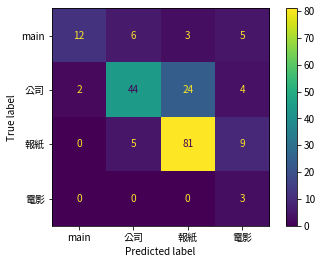

In [ ]:
disp.plot()
plt.show()